<a href="https://www.kaggle.com/code/lalit7881/gold-price-forecasting-dataset?scriptVersionId=295839365" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gold-price-forecasting-dataset/gold_price_forecasting_dataset.csv


## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/gold-price-forecasting-dataset/gold_price_forecasting_dataset.csv")

In [3]:
df.head()

,date,adj close,close,high,low,open,volume,ma_7,ma_30,ma_90,daily_return,volatility_7,volatility_30,rsi,macd,macd_signal,bb_upper,bb_lower
0,2021-06-11,1877.400024,1877.400024,1902.300049,1875.199951,1900.900024,349,1887.828561,1860.180005,1790.618891,-0.008869,0.009353,0.007538,54.722931,19.724030,24.933953,1918.242879,1853.797124
1,2021-06-14,1864.000000,1864.000000,1866.599976,1846.500000,1866.199951,41,1886.799997,1863.403337,1790.972225,-0.007138,0.006411,0.007711,49.391919,16.433420,23.233846,1913.119794,1861.530206
2,2021-06-15,1854.500000,1854.500000,1867.199951,1854.400024,1866.400024,78,1881.757132,1865.506669,1791.701114,-0.005097,0.004572,0.007474,45.972581,12.910196,21.169116,1914.969370,1858.380630
3,2021-06-16,1859.500000,1859.500000,1860.099976,1809.199951,1859.400024,117,1876.428554,1868.296667,1792.241113,0.002696,0.004348,0.007240,48.012515,10.401571,19.015607,1915.862799,1856.657196
4,2021-06-17,1773.800049,1773.800049,1823.300049,1769.599976,1811.800049,1135,1859.514282,1867.953337,1791.595558,-0.046088,0.016895,0.011288,28.293542,1.481124,15.508710,1938.202457,1823.567538


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1167 non-null   object 
 1   adj close      1167 non-null   float64
 2   close          1167 non-null   float64
 3   high           1167 non-null   float64
 4   low            1167 non-null   float64
 5   open           1167 non-null   float64
 6   volume         1167 non-null   int64  
 7   ma_7           1167 non-null   float64
 8   ma_30          1167 non-null   float64
 9   ma_90          1167 non-null   float64
 10  daily_return   1167 non-null   float64
 11  volatility_7   1167 non-null   float64
 12  volatility_30  1167 non-null   float64
 13  rsi            1167 non-null   float64
 14  macd           1167 non-null   float64
 15  macd_signal    1167 non-null   float64
 16  bb_upper       1167 non-null   float64
 17  bb_lower       1167 non-null   float64
dtypes: float

In [5]:
df.describe()

,adj close,close,high,low,open,volume,ma_7,ma_30,ma_90,daily_return,volatility_7,volatility_30,rsi,macd,macd_signal,bb_upper,bb_lower
count,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000
mean,2363.105823,2363.105823,2375.595715,2349.989545,2362.322109,4170.995716,2354.938862,2327.283295,2263.573357,0.000840,0.009373,0.009724,54.598187,16.332400,15.839374,2420.275644,2257.229746
std,749.127289,749.127289,757.244374,741.042344,749.389242,21394.527815,735.998718,697.354115,620.008940,0.010809,0.004356,0.002901,12.176024,31.412668,28.476902,758.759131,668.408638
min,1623.300049,1623.300049,1623.300049,1615.099976,1620.400024,0.000000,1643.671422,1659.240002,1705.499999,-0.113662,0.001791,0.004386,22.230260,-35.037415,-31.681349,1681.970545,1579.241564
25%,1827.299988,1827.299988,1831.600037,1816.800049,1825.250000,88.000000,1827.585711,1830.560004,1813.691667,-0.004360,0.006640,0.008116,46.452632,-4.904126,-4.022000,1881.291203,1775.139339
50%,1985.900024,1985.900024,1996.199951,1979.800049,1989.000000,297.000000,1986.785697,1978.813334,1948.046665,0.000945,0.008522,0.009115,53.983908,9.242215,9.448693,2038.438645,1932.450329
75%,2666.099976,2666.099976,2675.449951,2654.599976,2662.400024,867.500000,2654.771449,2659.524996,2588.156108,0.006842,0.011139,0.010711,62.790872,29.596166,28.529324,2728.408233,2582.183753
max,5318.399902,5318.399902,5586.200195,5301.600098,5415.700195,209783.000000,5070.914272,4620.783317,4252.532210,0.043643,0.051106,0.027369,87.227702,227.374043,170.076845,5310.168254,4263.597132


In [6]:
df.isnull().sum()

date             0
adj close        0
close            0
high             0
low              0
open             0
volume           0
ma_7             0
ma_30            0
ma_90            0
daily_return     0
volatility_7     0
volatility_30    0
rsi              0
macd             0
macd_signal      0
bb_upper         0
bb_lower         0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.shape

(1167, 18)

In [9]:
df.dtypes

date              object
adj close        float64
close            float64
high             float64
low              float64
open             float64
volume             int64
ma_7             float64
ma_30            float64
ma_90            float64
daily_return     float64
volatility_7     float64
volatility_30    float64
rsi              float64
macd             float64
macd_signal      float64
bb_upper         float64
bb_lower         float64
dtype: object

In [10]:
df.nunique()

date             1167
adj close        1094
close            1094
high             1088
low              1083
open             1084
volume            734
ma_7             1165
ma_30            1167
ma_90            1167
daily_return     1166
volatility_7     1167
volatility_30    1167
rsi              1166
macd             1167
macd_signal      1167
bb_upper         1166
bb_lower         1166
dtype: int64

In [11]:
df.columns

Index(['date', 'adj close', 'close', 'high', 'low', 'open', 'volume', 'ma_7',
       'ma_30', 'ma_90', 'daily_return', 'volatility_7', 'volatility_30',
       'rsi', 'macd', 'macd_signal', 'bb_upper', 'bb_lower'],
      dtype='object')

## Data visualizations

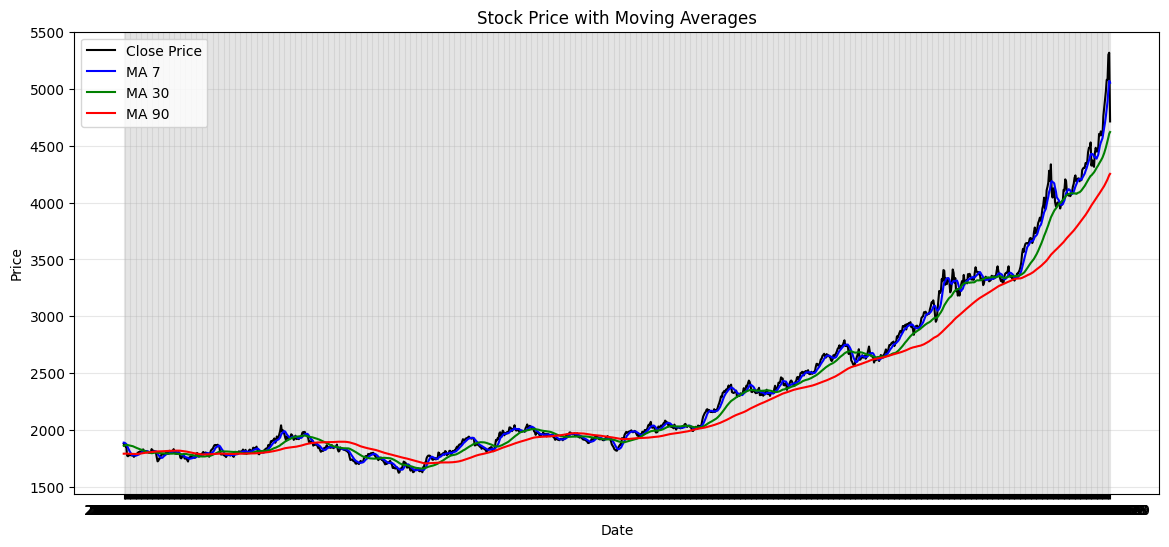

In [12]:
plt.figure(figsize=(14,6))
plt.plot(df['date'], df['close'], label='Close Price', color='black')
plt.plot(df['date'], df['ma_7'], label='MA 7', color='blue')
plt.plot(df['date'], df['ma_30'], label='MA 30', color='green')
plt.plot(df['date'], df['ma_90'], label='MA 90', color='red')

plt.title("Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


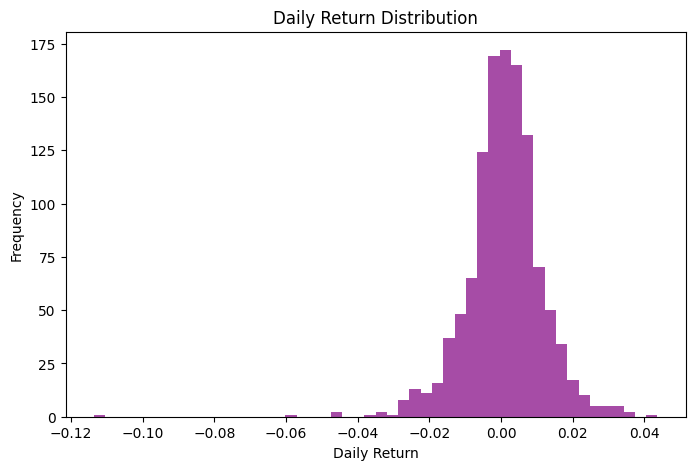

In [13]:
plt.figure(figsize=(8,5))
plt.hist(df['daily_return'], bins=50, color='purple', alpha=0.7)

plt.title("Daily Return Distribution")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()


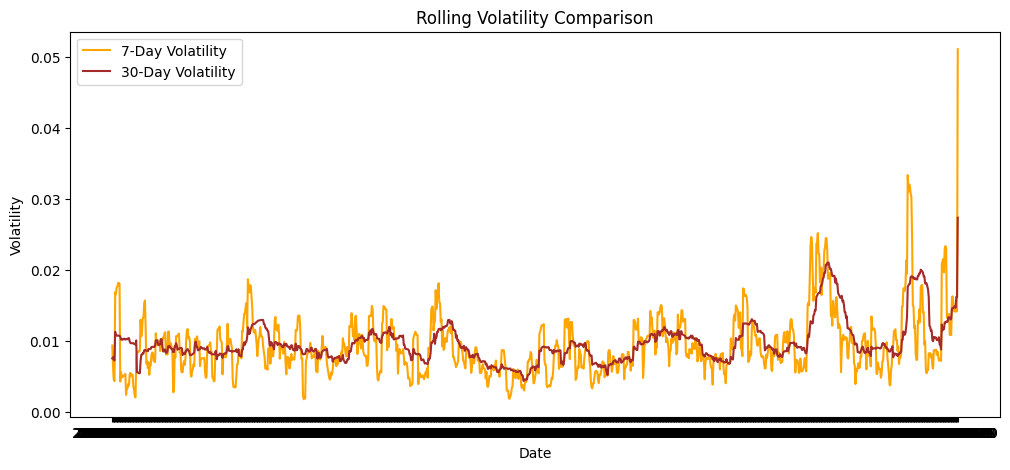

In [14]:
plt.figure(figsize=(12,5))
plt.plot(df['date'], df['volatility_7'], label='7-Day Volatility', color='orange')
plt.plot(df['date'], df['volatility_30'], label='30-Day Volatility', color='brown')

plt.title("Rolling Volatility Comparison")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()


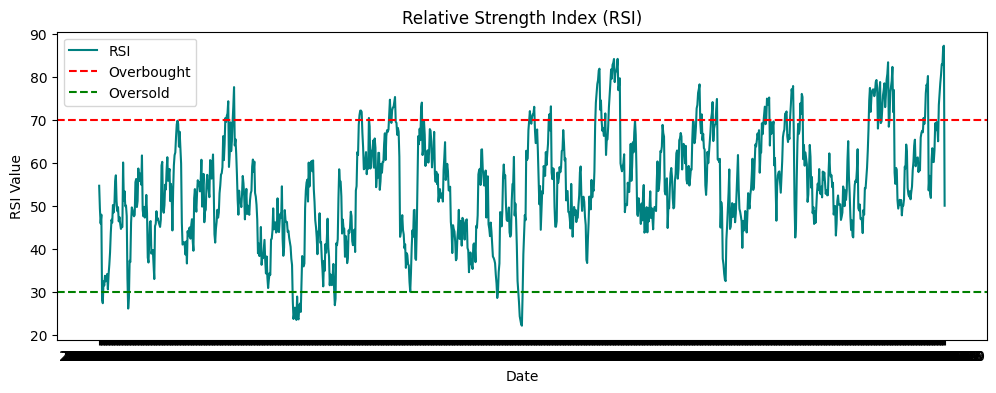

In [15]:
plt.figure(figsize=(12,4))
plt.plot(df['date'], df['rsi'], color='teal', label='RSI')

plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')

plt.title("Relative Strength Index (RSI)")
plt.xlabel("Date")
plt.ylabel("RSI Value")
plt.legend()
plt.show()


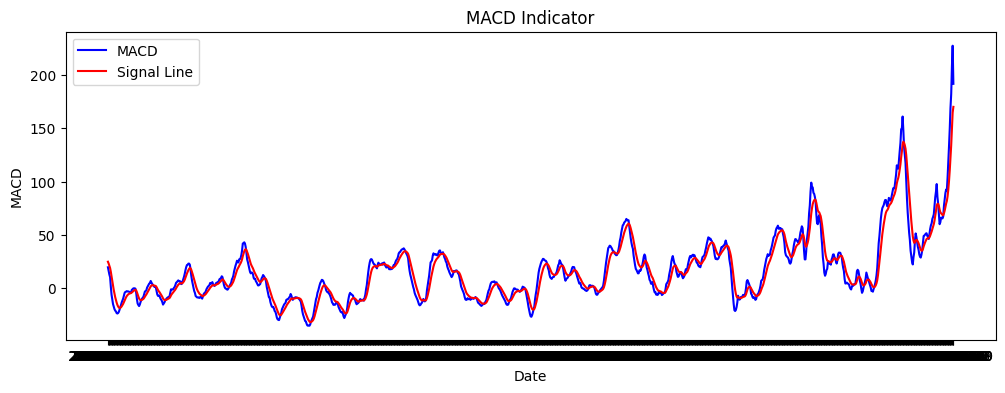

In [16]:
plt.figure(figsize=(12,4))
plt.plot(df['date'], df['macd'], label='MACD', color='blue')
plt.plot(df['date'], df['macd_signal'], label='Signal Line', color='red')

plt.title("MACD Indicator")
plt.xlabel("Date")
plt.ylabel("MACD")
plt.legend()
plt.show()


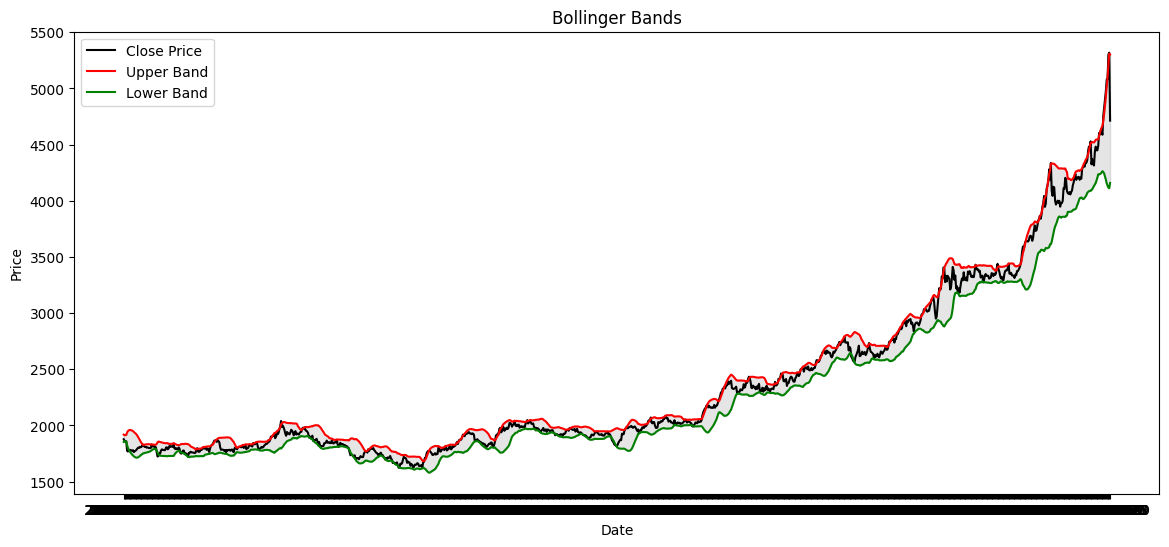

In [17]:
plt.figure(figsize=(14,6))
plt.plot(df['date'], df['close'], label='Close Price', color='black')
plt.plot(df['date'], df['bb_upper'], label='Upper Band', color='red')
plt.plot(df['date'], df['bb_lower'], label='Lower Band', color='green')

plt.fill_between(
    df['date'],
    df['bb_lower'],
    df['bb_upper'],
    color='gray',
    alpha=0.2
)

plt.title("Bollinger Bands")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


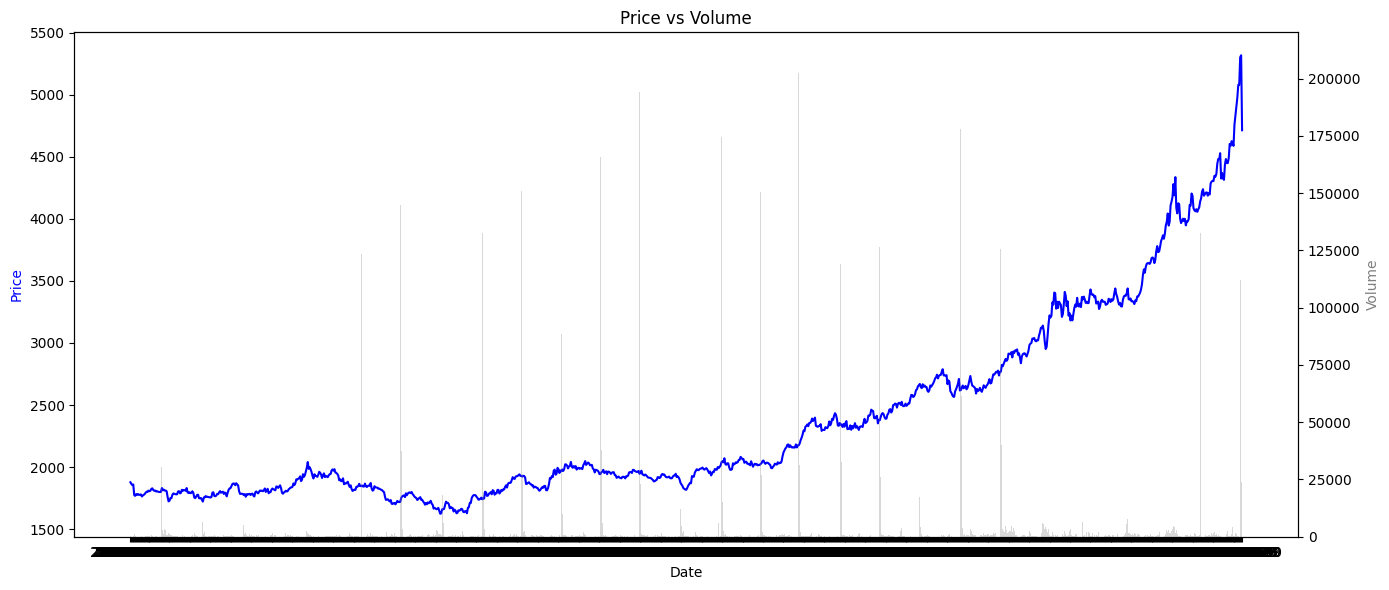

In [18]:
fig, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(df['date'], df['close'], color='blue', label='Close Price')
ax1.set_xlabel("Date")
ax1.set_ylabel("Price", color='blue')

ax2 = ax1.twinx()
ax2.bar(df['date'], df['volume'], color='gray', alpha=0.3, label='Volume')
ax2.set_ylabel("Volume", color='gray')

plt.title("Price vs Volume")
fig.tight_layout()
plt.show()


## Feature engg

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [21]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date').reset_index(drop=True)

In [22]:
for i in range(1, 8):
    df[f'lag_{i}'] = df['adj close'].shift(i)

# Rolling statistics (using past 7 days)
df['rolling_mean_7'] = df['adj close'].shift(1).rolling(7).mean()
df['rolling_std_7'] = df['adj close'].shift(1).rolling(7).std()

In [23]:
df = df.dropna().reset_index(drop=True)

In [24]:
features = [f'lag_{i}' for i in range(1,8)] + ['rolling_mean_7', 'rolling_std_7']
target = 'adj close'

X = df[features]
y = df[target]


In [25]:
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [26]:
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [27]:
y_pred = model.predict(X_test)

In [28]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 928.44
R² Score: -2.08


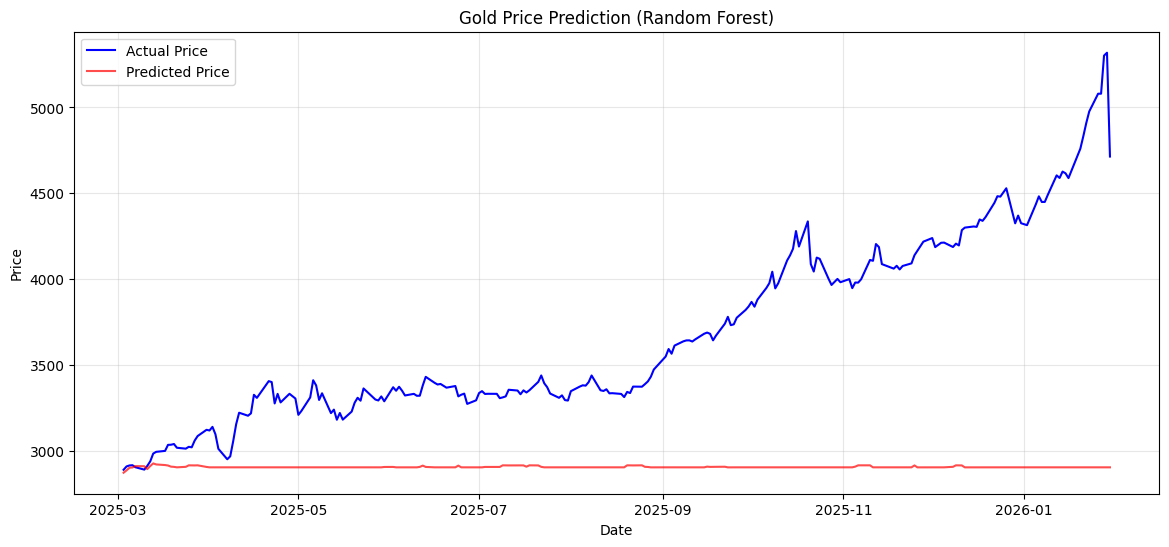

In [29]:
plt.figure(figsize=(14,6))
plt.plot(df['date'][train_size:], y_test, label='Actual Price', color='blue')
plt.plot(df['date'][train_size:], y_pred, label='Predicted Price', color='red', alpha=0.7)
plt.title("Gold Price Prediction (Random Forest)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

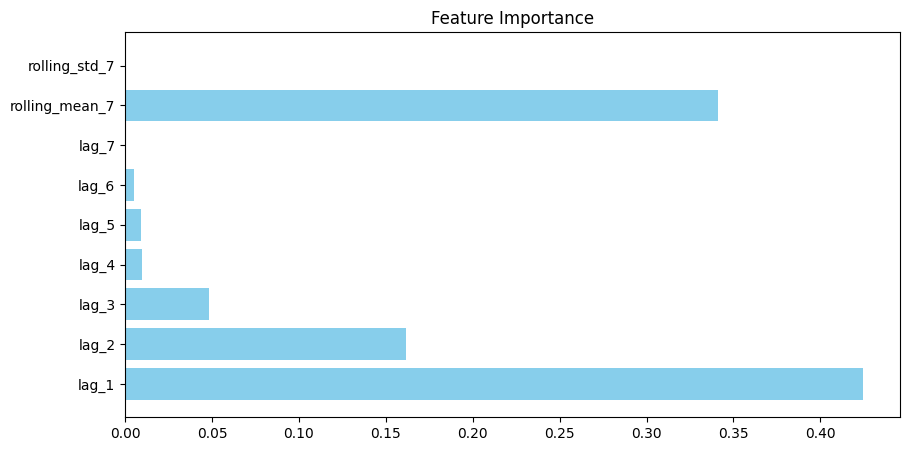

In [30]:
importances = model.feature_importances_
plt.figure(figsize=(10,5))
plt.barh(features, importances, color='skyblue')
plt.title("Feature Importance")
plt.show()

## Thank you...pls upvote!!